# ENCS5343 :Computer Vision
<h4>Course Project: <br> Arabic Handwritten Text Identification Using Deep Learning </h4>

<h4> <b>Mohammed Abed Alkareem - 1210708</b> </h4>

# Download Dataset

Dataset Link: https://data.mendeley.com/datasets/2h76672znt/1/files/9031138a-b812-433e-a704-8acb1707936e

<p>The dataset contains 65 different Arabic alphabets (with variations on begin, middle, end and regular alphabets), 10 different Arabic words (that encompass all Arabic alphabets) and 3 different paragraphs. The dataset was collected anonymously from 82 different users. Each user was asked to write each alphabet and word 10 times. A userid uniquely but anonymously identifies the writer of each alphabet, word and paragraph. In total, the dataset consists of 53199 alphabet images, 8144 word images and 241 paragraph images.</p>

- The file **"isolated_words_per_user.zip"** contains 8144 Arabic words organized into one folder per user

In [1]:
# download the dataset from the Mendeley Data
!wget https://data.mendeley.com/public-files/datasets/2h76672znt/files/9031138a-b812-433e-a704-8acb1707936e/file_downloaded -O isolated_words_per_user.zip

--2024-12-24 19:17:59--  https://data.mendeley.com/public-files/datasets/2h76672znt/files/9031138a-b812-433e-a704-8acb1707936e/file_downloaded
Loaded CA certificate '/usr/ssl/certs/ca-bundle.crt'
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/56076a80-b848-4c11-bc65-fa1a0423c35e [following]
--2024-12-24 19:18:00--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/56076a80-b848-4c11-bc65-fa1a0423c35e
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.68.159, 3.5.71.202, 52.218.85.56, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-wes

In [2]:
# unzip the dataset
import zipfile

with zipfile.ZipFile('isolated_words_per_user.zip', 'r') as zip_ref:
    zip_ref.extractall('isolated_words_per_user')

# import required libraries

In [ ]:
from models import *
from functions import *
from plot import *

import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

# Data Loading

## Define the transformation

In [ ]:
transform = transforms.Compose(
    [transforms.Resize((224, 224)), # Resize the image to 224x224 because there is no standard size for the images in the dataset
        transforms.ToTensor(),
        #make gray scale with 1 channel
        transforms.Grayscale(num_output_channels=1),
     transforms.Normalize((0.5,), (0.5,))])


# Define data augmentation for training !!!!!! change it to the one you want to use
aug_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Randomly crop and resize to 224x224
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Randomly change brightness, contrast, saturation, and hue
    transforms.RandomRotation(30),      # Randomly rotate images up to 30 degrees
    transforms.ToTensor(),              # Convert to tensor
    transforms.Grayscale(num_output_channels=1), #make gray scale with 1 channel
    transforms.Normalize((0.5,), (0.5,))  # Normalize
])


In [2]:
# Load the dataset
dataset = torchvision.datasets.ImageFolder(root='isolated_words_per_user/isolated_words_per_user', transform=transform)

# Load the augmented dataset
augmented_dataset = torchvision.datasets.ImageFolder(root='isolated_words_per_user/isolated_words_per_user', transform=aug_transform)



# Split the data into training , validation and test sets

In [ ]:
# Split the dataset into training and testing
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

#split the training to training and validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])


train_aug_size = int(0.8 * len(augmented_dataset))
test_aug_size = len(augmented_dataset) - train_aug_size
train_augmented_dataset, test_augmented_dataset = torch.utils.data.random_split(augmented_dataset, [train_aug_size, test_aug_size])

#split the training to training and validation
train_aug_size = int(0.8 * len(train_augmented_dataset))
val_aug_size = len(train_augmented_dataset) - train_aug_size
train_augmented_dataset, val_augmented_dataset = torch.utils.data.random_split(train_augmented_dataset, [train_aug_size, val_aug_size])


In [3]:
#classes are directory names in the dataset
classes = dataset.classes

In [4]:
classes

['user001',
 'user002',
 'user003',
 'user004',
 'user005',
 'user006',
 'user007',
 'user008',
 'user009',
 'user010',
 'user011',
 'user012',
 'user013',
 'user014',
 'user015',
 'user016',
 'user017',
 'user018',
 'user019',
 'user020',
 'user021',
 'user022',
 'user023',
 'user024',
 'user025',
 'user026',
 'user027',
 'user028',
 'user029',
 'user030',
 'user031',
 'user032',
 'user033',
 'user034',
 'user035',
 'user036',
 'user037',
 'user038',
 'user039',
 'user040',
 'user041',
 'user042',
 'user043',
 'user044',
 'user045',
 'user046',
 'user047',
 'user048',
 'user049',
 'user050',
 'user051',
 'user052',
 'user053',
 'user054',
 'user055',
 'user056',
 'user057',
 'user058',
 'user059',
 'user060',
 'user061',
 'user062',
 'user063',
 'user064',
 'user065',
 'user066',
 'user067',
 'user068',
 'user069',
 'user070',
 'user071',
 'user072',
 'user073',
 'user074',
 'user075',
 'user076',
 'user077',
 'user078',
 'user079',
 'user080',
 'user081',
 'user082']

## Create the data loaders

In [5]:
#define data loaders

batch_size = 128

train_loader = torch.utils.data.DataLoader(
    train_dataset,
      batch_size=batch_size,
        shuffle=True)

val_loader = torch.utils.data.DataLoader(
    val_dataset,
      batch_size=batch_size,
        shuffle=False)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
      batch_size=batch_size,
        shuffle=False)

train_aug_loader = torch.utils.data.DataLoader(
    train_augmented_dataset,
      batch_size=batch_size,
        shuffle=True)

val_aug_loader = torch.utils.data.DataLoader(
    val_augmented_dataset,
      batch_size=batch_size,
        shuffle=False)

test_aug_loader = torch.utils.data.DataLoader(
    test_augmented_dataset,
      batch_size=batch_size,
        shuffle=False)


In [6]:
print(f'Total batches in trainloader: {len(train_loader)}')
print(f'Total batches in valloader: {len(val_loader)}')
print(f'Total batches in testloader: {len(test_loader)}')


Total batches in trainloader: 41
Total batches in valloader: 11
Total batches in testloader: 13


In [7]:
#print shape of one image
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(f"batch shape: {images.shape}")
print(f"image shape: {images[0].shape}")

batch shape: torch.Size([128, 1, 224, 224])
image shape: torch.Size([1, 224, 224])


## Show Sample Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


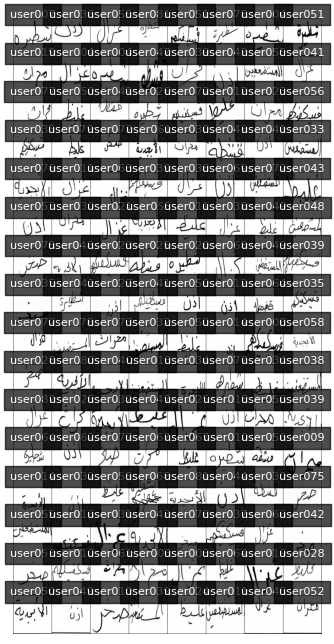

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

# Functions to show an image
def imshow(img, title):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.title(title)

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Create a grid of images
nrow = 8  # Number of images per row
grid_img = torchvision.utils.make_grid(images, nrow=nrow, padding=2)
grid_npimg = grid_img.numpy().transpose((1, 2, 0))  # Prepare the image grid for display

# Calculate image dimensions
img_height = grid_npimg.shape[0] // (len(images) // nrow + (1 if len(images) % nrow > 0 else 0))
img_width = grid_npimg.shape[1] // nrow

# Display the grid with class labels
plt.figure(figsize=(12, 8))
plt.imshow(grid_npimg)
plt.axis('off')

# Add class labels on top of each image
for i in range(len(images)):
    row = i // nrow
    col = i % nrow
    label = classes[labels[i]]
    x = col * img_width + img_width // 2  # Center horizontally in the image
    y = row * img_height + 10            # Place slightly above the image
    plt.text(x, y, label, ha='center', va='bottom', fontsize=8, color='white',
             bbox=dict(facecolor='black', alpha=0.7))

plt.show()


# Task 1:Build and train a custom CNN network.

## Model 1:
CNN model with 2 convolutional layers and 2 fully connected layers

In [9]:
net = NetCNN_1()

In [10]:
net

NetCNN_1(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 9, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=28224, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=82, bias=True)
)

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)


Epoch 1
Epoch 1 Average Loss: 4.417, Validation Loss: 4.269
Epoch 1 Training Accuracy: 0.019, Validation Accuracy: 0.032
Epoch 2
Epoch 2 Average Loss: 3.818, Validation Loss: 3.530
Epoch 2 Training Accuracy: 0.108, Validation Accuracy: 0.128
Epoch 3
Epoch 3 Average Loss: 2.943, Validation Loss: 3.338
Epoch 3 Training Accuracy: 0.264, Validation Accuracy: 0.190
Epoch 4
Epoch 4 Average Loss: 2.231, Validation Loss: 3.452
Epoch 4 Training Accuracy: 0.420, Validation Accuracy: 0.203
Epoch 5
Epoch 5 Average Loss: 1.532, Validation Loss: 3.877
Epoch 5 Training Accuracy: 0.581, Validation Accuracy: 0.210
Epoch 6
Epoch 6 Average Loss: 0.946, Validation Loss: 4.375
Epoch 6 Training Accuracy: 0.740, Validation Accuracy: 0.223
Epoch 7
Epoch 7 Average Loss: 0.510, Validation Loss: 5.172
Epoch 7 Training Accuracy: 0.865, Validation Accuracy: 0.238
Epoch 8
Epoch 8 Average Loss: 0.235, Validation Loss: 5.646
Epoch 8 Training Accuracy: 0.947, Validation Accuracy: 0.235
Epoch 9
Epoch 9 Average Loss: 0.

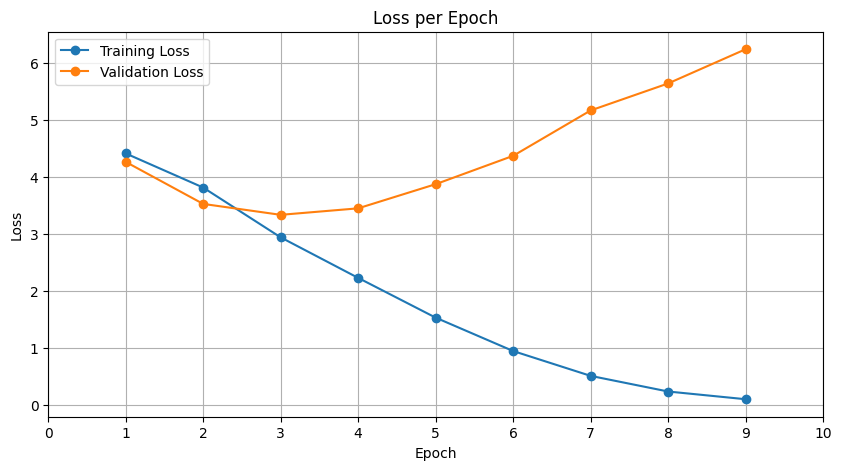

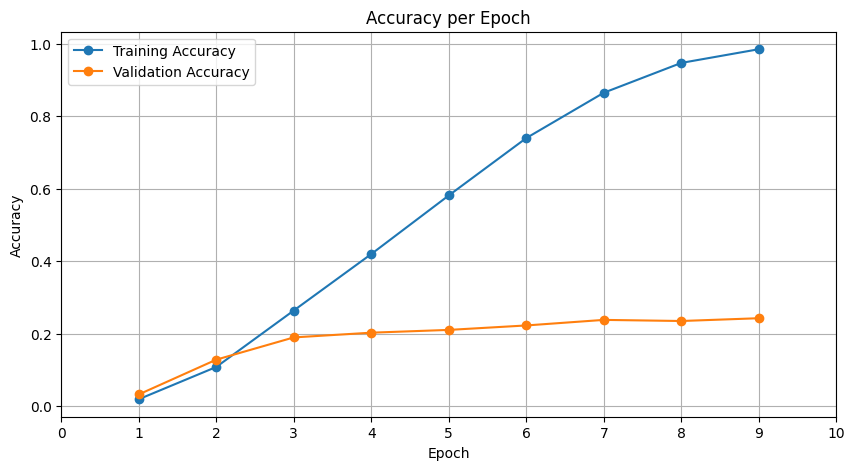

In [15]:
plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)